In [ ]:
from google.colab import drive
from google.colab import files
import pandas as pd

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/earthquake/new_datasets/'

In [ ]:
df = pd.read_csv(path + '1900.csv')
df.head()

,Unnamed: 0,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,0,1900-02-16T22:10:00.000Z,60.0,-140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ushis,ushis387,2018-06-04T20:43:44.000Z,Southeastern Alaska,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,ushis
1,0,1900-04-09T14:00:00.000Z,41.4,-81.9,NaN,3.4,fa,NaN,NaN,NaN,NaN,ushis,ushis388,2018-06-04T20:43:44.000Z,"Cleveland urban area, Ohio",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,bar
2,0,1900-04-30T22:41:14.000Z,36.9,-121.6,NaN,4.5,ml,NaN,NaN,NaN,NaN,ushis,ushis389,2018-06-04T20:43:44.000Z,Central California,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,cdmg
3,0,1900-07-29T06:59:00.000Z,-10.0,165.0,0.0,7.6,mw,NaN,NaN,NaN,NaN,iscgem,iscgem16957713,2020-07-09T21:50:21.653Z,Santa Cruz Islands,earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
4,0,1900-08-01T07:45:00.000Z,40.0,-112.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ushis,ushis390,2018-06-04T20:43:44.000Z,Utah,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,ushis


In [ ]:
for idx in range(1901, 2020):
  link = path + str(idx) + '.csv'
  temp = pd.read_csv(link)
  df = df.append(temp)
  print(f'Length after {idx} added: {len(df)}')

Length after 1901 added: 17
Length after 1902 added: 32
Length after 1903 added: 47
Length after 1904 added: 56
Length after 1905 added: 78
Length after 1906 added: 106
Length after 1907 added: 116
Length after 1908 added: 129
Length after 1909 added: 152
Length after 1910 added: 180
Length after 1911 added: 199
Length after 1912 added: 222
Length after 1913 added: 239
Length after 1914 added: 257
Length after 1915 added: 282
Length after 1916 added: 314
Length after 1917 added: 344
Length after 1918 added: 399
Length after 1919 added: 439
Length after 1920 added: 479
Length after 1921 added: 510
Length after 1922 added: 557
Length after 1923 added: 625
Length after 1924 added: 678
Length after 1925 added: 748
Length after 1926 added: 823
Length after 1927 added: 885
Length after 1928 added: 964
Length after 1929 added: 1047
Length after 1930 added: 1122
Length after 1931 added: 1202
Length after 1932 added: 1753
Length after 1933 added: 2956
Length after 1934 added: 3728
Length after 

In [ ]:
df = df.sort_values('time', ignore_index=True).iloc[:, 1:]

In [ ]:
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1900-02-16T22:10:00.000Z,60.0000,-140.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ushis,ushis387,2018-06-04T20:43:44.000Z,Southeastern Alaska,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,ushis
1,1900-04-09T14:00:00.000Z,41.4000,-81.9000,NaN,3.40,fa,NaN,NaN,NaN,NaN,ushis,ushis388,2018-06-04T20:43:44.000Z,"Cleveland urban area, Ohio",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,bar
2,1900-04-30T22:41:14.000Z,36.9000,-121.6000,NaN,4.50,ml,NaN,NaN,NaN,NaN,ushis,ushis389,2018-06-04T20:43:44.000Z,Central California,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,cdmg
3,1900-07-29T06:59:00.000Z,-10.0000,165.0000,0.00,7.60,mw,NaN,NaN,NaN,NaN,iscgem,iscgem16957713,2020-07-09T21:50:21.653Z,Santa Cruz Islands,earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
4,1900-08-01T07:45:00.000Z,40.0000,-112.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ushis,ushis390,2018-06-04T20:43:44.000Z,Utah,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,ushis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3801799,2019-12-31T23:53:22.516Z,45.0723,-74.7236,18.07,1.60,ml,NaN,106.0,0.3970,0.30,us,us70006ulk,2020-03-14T22:22:47.040Z,"6km N of Cornwall, Canada",earthquake,1.90,7.10,0.115,10.0,reviewed,us,us
3801800,2019-12-31T23:53:33.540Z,17.9996,-66.9188,2.00,1.51,md,3.0,209.0,0.0466,0.15,pr,pr2019365201,2020-01-02T20:30:07.142Z,"1km NNW of Fuig, Puerto Rico",earthquake,1.71,10.84,0.290,2.0,reviewed,pr,pr
3801801,2019-12-31T23:54:01.780Z,17.9241,-66.8786,6.00,2.19,md,6.0,221.0,0.0510,0.07,pr,pr2019365202,2020-01-02T20:29:47.798Z,"6km SSE of Guanica, Puerto Rico",earthquake,0.74,0.36,0.300,6.0,reviewed,pr,pr
3801802,2019-12-31T23:56:59.933Z,-20.5382,168.9571,21.46,4.30,mb,NaN,147.0,1.2760,0.50,us,us7000709t,2020-03-14T22:22:47.040Z,"114km SSW of Isangel, Vanuatu",earthquake,5.60,7.70,0.160,11.0,reviewed,us,us


In [ ]:
df.to_csv('1900-2019_(scrapping annual).csv')

In [ ]:
files.download('1900-2019_(scrapping annual).csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
len(df)

3801804

In [ ]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1900-02-16T22:10:00.000Z,60.0,-140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ushis,ushis387,2018-06-04T20:43:44.000Z,Southeastern Alaska,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,ushis
1,1900-04-09T14:00:00.000Z,41.4,-81.9,NaN,3.4,fa,NaN,NaN,NaN,NaN,ushis,ushis388,2018-06-04T20:43:44.000Z,"Cleveland urban area, Ohio",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,bar
2,1900-04-30T22:41:14.000Z,36.9,-121.6,NaN,4.5,ml,NaN,NaN,NaN,NaN,ushis,ushis389,2018-06-04T20:43:44.000Z,Central California,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,cdmg
3,1900-07-29T06:59:00.000Z,-10.0,165.0,0.0,7.6,mw,NaN,NaN,NaN,NaN,iscgem,iscgem16957713,2020-07-09T21:50:21.653Z,Santa Cruz Islands,earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
4,1900-08-01T07:45:00.000Z,40.0,-112.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ushis,ushis390,2018-06-04T20:43:44.000Z,Utah,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,ushis


In [ ]:
dataset = df.copy()

In [ ]:
dataset['year'] = pd.to_datetime(dataset['time']).dt.year
dataset['month'] = pd.to_datetime(dataset['time']).dt.month
dataset.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,year,month
0,1900-02-16T22:10:00.000Z,60.0,-140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ushis,ushis387,2018-06-04T20:43:44.000Z,Southeastern Alaska,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,ushis,1900,2
1,1900-04-09T14:00:00.000Z,41.4,-81.9,NaN,3.4,fa,NaN,NaN,NaN,NaN,ushis,ushis388,2018-06-04T20:43:44.000Z,"Cleveland urban area, Ohio",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,bar,1900,4
2,1900-04-30T22:41:14.000Z,36.9,-121.6,NaN,4.5,ml,NaN,NaN,NaN,NaN,ushis,ushis389,2018-06-04T20:43:44.000Z,Central California,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,cdmg,1900,4
3,1900-07-29T06:59:00.000Z,-10.0,165.0,0.0,7.6,mw,NaN,NaN,NaN,NaN,iscgem,iscgem16957713,2020-07-09T21:50:21.653Z,Santa Cruz Islands,earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem,1900,7
4,1900-08-01T07:45:00.000Z,40.0,-112.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ushis,ushis390,2018-06-04T20:43:44.000Z,Utah,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,ushis,1900,8


In [ ]:
"""
start_string = '1966-12-16T20:52:18.000Z'
end_string = '2016-09-28T21:36:31.970Z'
idx_start = dataset.index[dataset['time'] == start_string][0]
idx_end = dataset.index[dataset['time'] == end_string][0]
selected_dataset = dataset[idx_start:idx_end + 1]
"""

"\nstart_string = '1966-12-16T20:52:18.000Z'\nend_string = '2016-09-28T21:36:31.970Z'\nidx_start = dataset.index[dataset['time'] == start_string][0]\nidx_end = dataset.index[dataset['time'] == end_string][0]\nselected_dataset = dataset[idx_start:idx_end + 1]\n"

In [ ]:
def slicing_dateset(df, yfrom, yto, mag=0, types='earthquake'):
  cond1 = df['year'] >= yfrom
  cond2 = df['year'] <= yto
  cond3 = df['mag'] >= mag
  cond4 = df['type'] == types
  df = df[cond1 & cond2 & cond3 & cond4]
  return df

In [ ]:
selected_dataset = slicing_dateset(dataset, 1966, 2016, 4.5)
len(selected_dataset)

222529

In [ ]:
times = list(selected_dataset.set_index(['year', 'month']).index.unique())

In [ ]:
# lons = [75, 119]
# lats = [23, 45]
def slicing_area(df, lats, lons):
  cond1 = df['longitude'] >= lons[0]
  cond2 = df['longitude'] <= lons[1]
  cond3 = df['latitude'] >= lats[0]
  cond4 = df['latitude'] <= lats[1]
  df = df[cond1 & cond2 & cond3 & cond4]
  return df

In [ ]:
lons = [75, 119]
lats = [23, 45]
selected_area = slicing_area(selected_dataset, lats, lons)
len(selected_area)

5603

In [ ]:
selected_area[selected_area.index.duplicated()]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,year,month


In [ ]:
list_latitudes, list_longitudes = [], []

# 9 squares (3x3)
def ranges(X, Y, nb):
    step = (Y-X) / nb
    return [(X + round(step*i), X + round(step*(i + 1))) for i in range(nb)]

list_longitudes = ranges(75, 119, 3)
list_latitudes = ranges(23, 45, 3)
list_longitudes, list_latitudes

([(75, 90), (90, 104), (104, 119)], [(23, 30), (30, 38), (38, 45)])

In [ ]:
def classify_location(row, lats, lons):
  a = lats[0]
  b = lats[1]
  c = lats[2]

  x = lons[0]
  y = lons[1]
  z = lons[2]

  if a[0] <= row['latitude'] < a[1]:
      if x[0] <= row['longitude'] < x[1]:
        return 1
      if y[0] <= row['longitude'] < y[1]:
        return 2
      if z[0] <= row['longitude'] < z[1]:
        return 3
  if b[0] <= row['latitude'] < b[1]:
      if x[0] <= row['longitude'] < x[1]:
        return 4
      if y[0] <= row['longitude'] < y[1]:
        return 5
      if z[0] <= row['longitude'] < z[1]:
        return 6
  if c[0] <= row['latitude'] <= c[1]:
      if x[0] <= row['longitude'] < x[1]:
        return 7
      if y[0] <= row['longitude'] < y[1]:
        return 8
      if z[0] <= row['longitude'] < z[1]:
        return 9

In [ ]:
selected_area['classify'] = selected_area.apply(lambda row: classify_location(row, list_latitudes, list_longitudes), axis=1)
selected_area.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,year,month,classify
27374,1966-02-05T15:12:31.000Z,26.246,103.187,10.0,6.4,mw,NaN,NaN,NaN,NaN,iscgem,iscgem849911,2020-07-10T02:08:38.184Z,"Yunnan, China",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem,1966,2,2
27397,1966-02-13T10:44:40.000Z,26.120,103.222,10.0,5.9,mw,NaN,NaN,NaN,NaN,iscgem,iscgem850150,2020-07-10T02:10:06.284Z,"Yunnan, China",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem,1966,2,2
27460,1966-03-06T02:10:56.000Z,31.525,80.487,20.0,6.7,mw,NaN,NaN,NaN,NaN,iscgem,iscgem848978,2020-07-10T02:02:55.572Z,western Xizang,earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem,1966,3,4
27461,1966-03-06T02:15:56.000Z,31.422,80.554,20.0,6.3,mw,NaN,NaN,NaN,NaN,iscgem,iscgem848981,2020-07-10T02:03:13.931Z,western Xizang,earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem,1966,3,4
27465,1966-03-07T21:29:19.000Z,37.156,114.875,25.0,6.5,mw,NaN,NaN,NaN,NaN,iscgem,iscgem849021,2020-07-10T02:03:37.721Z,"Hebei, China",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem,1966,3,6


In [ ]:
years, months = [], []
for idx in times:
  years.append(idx[0])
  months.append(idx[1])

df_time = pd.DataFrame({'year': years, 'month': months})

In [ ]:
selected_area = selected_area[['year', 'month', 'classify']]

In [ ]:
merged_area = pd.merge(df_time, selected_area, on=['year', 'month'], how='left')

In [ ]:
merged_area.classify.unique()

array([nan,  2.,  4.,  6.,  1.,  9.,  5.,  7.,  8.,  3.])

In [ ]:
merged_area['classify'] = merged_area['classify'].fillna(0)

In [ ]:
import numpy as np

In [ ]:
merged_area = merged_area.astype({
    'year': np.int32,
    'month': np.int32,
    'classify': np.int32
})
merged_area.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5657 entries, 0 to 5656
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   year      5657 non-null   int32
 1   month     5657 non-null   int32
 2   classify  5657 non-null   int32
dtypes: int32(3)
memory usage: 110.5 KB


In [ ]:
merged_area_agg = pd.pivot_table(merged_area, columns='classify',index=['year', 'month'], aggfunc={'classify': 'count'}, fill_value=0).reset_index()
merged_area_agg

year month classify                           
classify                    0  1  2  3  4  5  6  7  8  9
0         1966     1        1  0  0  0  0  0  0  0  0  0
1         1966     2        0  0  2  0  0  0  0  0  0  0
2         1966     3        0  0  0  0  2  0  6  0  0  0
3         1966     4        1  0  0  0  0  0  0  0  0  0
4         1966     5        1  0  0  0  0  0  0  0  0  0
..         ...   ...      ... .. .. .. .. .. .. .. .. ..
607       2016     8        0  0  3  0  7  1  0  1  0  0
608       2016     9        0  0  4  0  1  4  0  0  1  1
609       2016    10        0  0  5  0  0  4  1  0  0  0
610       2016    11        0  1  2  0  0  2  0  1  1  0
611       2016    12        0  1  2  1  1  1  0  5  2  0

[612 rows x 12 columns]

In [ ]:
baseline_area = merged_area_agg.iloc[:, 3:]
baseline_area.columns = baseline_area.columns.droplevel(0)
baseline_area = baseline_area.rename_axis(None, axis=1)
baseline_area

,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0,0
2,0,0,0,2,0,6,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
607,0,3,0,7,1,0,1,0,0
608,0,4,0,1,4,0,0,1,1
609,0,5,0,0,4,1,0,0,0
610,1,2,0,0,2,0,1,1,0


In [ ]:
def multihot(x):
  return 1 if x > 0 else 0

In [ ]:
matrix_multihot_area = baseline_area.copy()

In [ ]:
for idx in range(0, 9):
  matrix_multihot_area.iloc[:, idx] = matrix_multihot_area.iloc[:, idx].apply(lambda x: multihot(x))

matrix_multihot_area

,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
607,0,1,0,1,1,0,1,0,0
608,0,1,0,1,1,0,0,1,1
609,0,1,0,0,1,1,0,0,0
610,1,1,0,0,1,0,1,1,0


In [ ]:
# Baseline two dimension case
n_split = int(np.floor(len(matrix_multihot_area) * .7))
train = matrix_multihot_area[:n_split]
test = matrix_multihot_area[n_split:]

# Set train, validation, test to float32
test = test.astype(np.float32)
train = train.astype(np.float32)

train.shape, test.shape

((428, 9), (184, 9))

In [ ]:
# Baseline two dimension case
n_split = int(np.floor(len(baseline_area) * .7))
train = baseline_area[:n_split]
test = baseline_area[n_split:]

# Set train, validation, test to float32
test = test.astype(np.float32)
train = train.astype(np.float32)

train.shape, test.shape

((428, 9), (184, 9))

In [ ]:
# Creating sequences datasets
def create_sequence(series, sequence_len):
  datasetX, datasetY = [], []
  
  for i in range(len(series) - sequence_len - 1):
    x = series[i: (i + sequence_len), :]
    y = series[i + sequence_len, :]
    datasetX.append(x)
    datasetY.append(y)
  
  return np.array(datasetX), np.array(datasetY)

In [ ]:
# Choose a number of time steps
n_steps = 12

# Convert into input/output
x_train, y_train = create_sequence(train.values, n_steps)
x_test, y_test = create_sequence(test.values, n_steps)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(415, 12, 9) (415, 9) (171, 12, 9) (171, 9)


In [ ]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Flatten, Dense, LSTM, Dropout, Bidirectional, Activation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras.backend import clear_session

In [ ]:
def lstm(n_input, loss=['mse'], metrics=['mse'], optimizer=optimizers.RMSprop(), activation='softmax'):
  model = Sequential()
  model.add(LSTM(128, input_shape=(n_input, 9), return_sequences=True))
  model.add(LSTM(128, return_sequences=False))
  model.add(Dropout(0.2))
  model.add(Dense(256))
  model.add(Dense(64))
  model.add(Dense(9))
  model.add(Activation(activation))
  model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
  model.summary()

  return model

In [ ]:
# Set callback
callbacks = [
    EarlyStopping(patience=5, verbose=1),
    ReduceLROnPlateau(factor=0.25, patience=3, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [ ]:
def stable_softmax(X):
    exps = np.exp(X - np.max(X))
    return exps / np.sum(exps)

def cross_entropy(X,y):
    m = y.shape[0]
    p = stable_softmax(X)
    log_likelihood = -np.log(p[range(m),y])
    loss = np.sum(log_likelihood) / m
    return loss

In [ ]:
clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Initial assignment & Tuning parameters
BATCH_SIZE = 64
LEARNING_RATE = 0.001
RHO = 0.9
EPSILON = 1e-01
LOSS_FUNCTION = 'mse'
ACTIVATION_FUNCTION = 'softmax'
EPOCHS = 20

OPTIMIZER=optimizers.RMSprop(lr=LEARNING_RATE, rho=RHO, epsilon=EPSILON)

lstm_model = lstm(n_steps, loss=LOSS_FUNCTION, metrics=['accuracy'], optimizer=OPTIMIZER, activation=ACTIVATION_FUNCTION)

lstm_history = lstm_model.fit(x_train, y_train, 
                              validation_data=(x_test, y_test), 
                              batch_size=BATCH_SIZE, 
                              epochs=EPOCHS,
                              callbacks=callbacks,
                              verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 12, 128)           70656     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               33024     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 585       
_________________________________________________________________
activation (Activation)      (None, 9)                 0

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Define history
def plot_history(history, metric):
  
  # Get loss and accuracy
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  m = history.history[metric]
  val_m = history.history['val_' + metric]

  # Show graph loss dan accuracy
  plt.figure(figsize=(15, 5))

  plt.subplot(1, 2, 1)
  plt.title('Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(loss, label='Training set')
  plt.plot(val_loss, label='Validation set', linestyle='--')
  plt.legend()
  plt.grid(linestyle='--', linewidth=1, alpha=0.5)

  plt.subplot(1, 2, 2)
  plt.title(str.upper(metric))
  plt.xlabel('Epoch')
  plt.ylabel(str.upper(metric))
  plt.plot(m, label='Training set')
  plt.plot(val_m, label='Validation set', linestyle='--')
  plt.legend()
  plt.grid(linestyle='--', linewidth=1, alpha=0.5)

  plt.show()

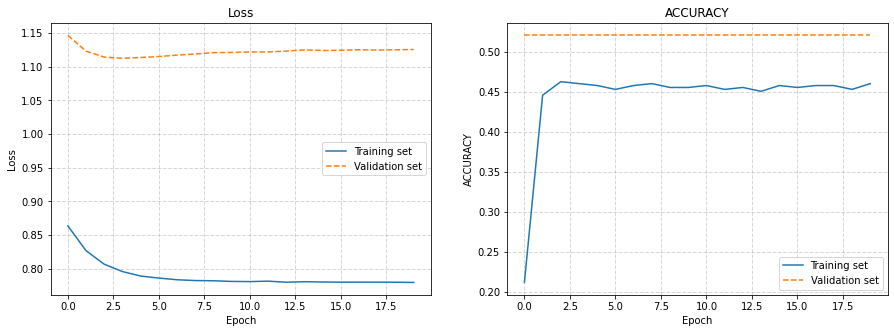

In [ ]:
plot_history(lstm_history, 'accuracy')

In [ ]:
train_predict_proba = lstm_model.predict_proba(x_train, batch_size=BATCH_SIZE)
predict_result = lstm_model.predict(x_test, batch_size=BATCH_SIZE)
predict_proba = lstm_model.predict_proba(x_test, batch_size=BATCH_SIZE)

predict_result[predict_result >= 0.5] = 1
predict_result[predict_result < 0.5] = 0

Instructions for updating:
Please use `model.predict()` instead.


In [ ]:
#Evaluate the output
loss, accuracy = lstm_model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)

3/3 [==============================] - 0s 3ms/step - loss: 1.1257 - accuracy: 0.5205


In [ ]:
#print out the performance
print ("\nSystem performance:")
print ("Test loss : " + str(loss))
print ("Test accuracy : " + str(accuracy))

prediction = lstm_model.predict(x_test, batch_size=BATCH_SIZE)
mse = np.mean(np.square(prediction - y_test), axis=1)
score = np.mean(mse)
print("Test MSE : " + str(score))


System performance:
Test loss : 1.1257222890853882
Test accuracy : 0.5204678177833557
Test MSE : 0.37938643


In [ ]:
# print raw_data_matrix
df_raw = pd.DataFrame(y_train)
df_raw.to_csv('y_train.csv')

# print raw_data_matrix
df_raw = pd.DataFrame(train_predict_proba)
df_raw.to_csv('train_predict_proba.csv')

# print raw_data_matrix
df_raw = pd.DataFrame(y_test)
df_raw.to_csv('y_test')

# print raw_data_matrix
df_raw = pd.DataFrame(predict_result)
df_raw.to_csv('predict_result.csv')

# print raw_data_matrix
df_raw = pd.DataFrame(predict_proba)
df_raw.to_csv('predict_proba.csv')